Original DataFrame:
   col1 col2  col3
0   1.0    A  10.0
1   2.0  NaN  20.0
2   NaN    B  30.0
3   4.0    A   NaN
4   5.0    C  50.0

--- Detecting Missing Data ---

Boolean DataFrame indicating missing values:
    col1   col2   col3
0  False  False  False
1  False   True  False
2   True  False  False
3  False  False   True
4  False  False  False

Number of missing values per column:
col1    1
col2    1
col3    1
dtype: int64

Total number of missing values in the DataFrame: 3


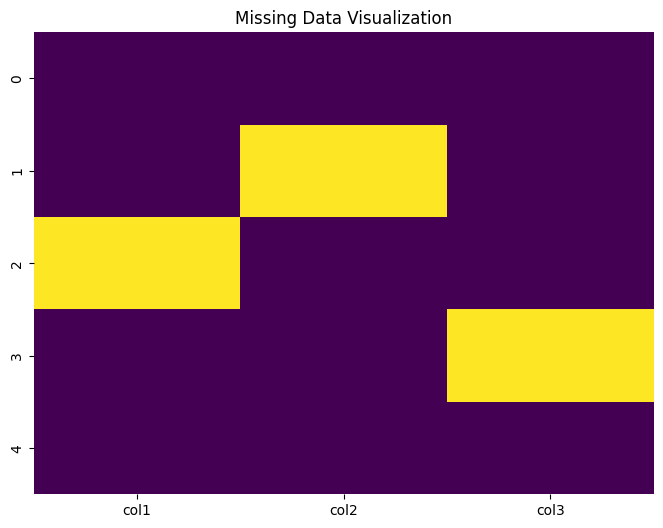

------------------------------

--- Handling Missing Data by Dropping ---

DataFrame after dropping rows with any missing values:
   col1 col2  col3
0   1.0    A  10.0
4   5.0    C  50.0
Shape of original DataFrame: (5, 3)
Shape of DataFrame after dropping rows: (2, 3)

DataFrame after dropping columns with any missing values:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]
Shape of original DataFrame: (5, 3)
Shape of DataFrame after dropping columns: (5, 0)
------------------------------

--- Handling Missing Data by Imputation ---

DataFrame after filling missing values in 'col1' with the mean:
   col1 col2  col3
0   1.0    A  10.0
1   2.0  NaN  20.0
2   3.0    B  30.0
3   4.0    A   NaN
4   5.0    C  50.0

DataFrame after filling missing values in 'col2' with the mode:
   col1 col2  col3
0   1.0    A  10.0
1   2.0    A  20.0
2   NaN    B  30.0
3   4.0    A   NaN
4   5.0    C  50.0

DataFrame after filling missing values in 'col3' with 0:
   col1 col2  col3
0   1.0    A  10.0
1   

/tmp/ipykernel_39553/1685112576.py:86: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Missing' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_filled_constant.fillna('Missing', inplace=True)


In [1]:
import pandas as pd
import numpy as np

# --- Task 1: Detect Missing Data ---
# 1. Load the Data:
data = {'col1': [1, 2, np.nan, 4, 5],
        'col2': ['A', np.nan, 'B', 'A', 'C'],
        'col3': [10.0, 20.0, 30.0, np.nan, 50.0]}
df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

# 2. Detect Missing Data:
print("\n--- Detecting Missing Data ---")

# Check for NaN values using isnull()
print("\nBoolean DataFrame indicating missing values:")
print(df.isnull())

# Count missing values per column
missing_counts_column = df.isnull().sum()
print("\nNumber of missing values per column:")
print(missing_counts_column)

# Total number of missing values in the DataFrame
total_missing = df.isnull().sum().sum()
print("\nTotal number of missing values in the DataFrame:", total_missing)

# Visualize missing data (optional, requires matplotlib)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Visualization')
plt.show()

print("-" * 30)

# --- Task 2: Handle Missing Data by Dropping ---
print("\n--- Handling Missing Data by Dropping ---")

# 1. Drop Rows with Missing Values:
df_dropped_rows = df.dropna()
print("\nDataFrame after dropping rows with any missing values:")
print(df_dropped_rows)
print(f"Shape of original DataFrame: {df.shape}")
print(f"Shape of DataFrame after dropping rows: {df_dropped_rows.shape}")

# Drop columns with missing values (less common, but possible)
df_dropped_cols = df.dropna(axis=1)
print("\nDataFrame after dropping columns with any missing values:")
print(df_dropped_cols)
print(f"Shape of original DataFrame: {df.shape}")
print(f"Shape of DataFrame after dropping columns: {df_dropped_cols.shape}")

print("-" * 30)

# --- Task 3: Handle Missing Data by Imputation ---
print("\n--- Handling Missing Data by Imputation ---")

# 1. Fill Missing Values:

# Fill NaN in 'col1' (numeric) with the mean
df_filled_mean = df.copy()
mean_col1 = df_filled_mean['col1'].mean()
df_filled_mean['col1'].fillna(mean_col1, inplace=True)
print("\nDataFrame after filling missing values in 'col1' with the mean:")
print(df_filled_mean)

# Fill NaN in 'col2' (categorical) with the mode
df_filled_mode = df.copy()
mode_col2 = df_filled_mode['col2'].mode()[0]
df_filled_mode['col2'].fillna(mode_col2, inplace=True)
print("\nDataFrame after filling missing values in 'col2' with the mode:")
print(df_filled_mode)

# Fill NaN in 'col3' (numeric) with a specific value (e.g., 0)
df_filled_zero = df.copy()
df_filled_zero['col3'].fillna(0, inplace=True)
print("\nDataFrame after filling missing values in 'col3' with 0:")
print(df_filled_zero)

# Fill all NaN values with a constant
df_filled_constant = df.copy()
df_filled_constant.fillna('Missing', inplace=True)
print("\nDataFrame after filling all missing values with 'Missing':")
print(df_filled_constant)